## Analyzing the (Small) Universe of Potential Loans to SME Agrofirms

This notebook analyzes 200 hypothetical small loans to shareholder farmers and SME agrofirms in developing countries. Most of the loans are not profit-generating; they are intended to be subsidized by donor funding or grants. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import structures_and_methods
field_converters={'Loan Number':float, 'Loan Amount (USD)':float, 'Industry':str, 'Lending Region':str, \
            'Country':str, 'Loan Additionality':str, 'Climate Change Hotspot':str,'Biodiversity Hotspot':str, \
            'Soil Degradation Hotspot':str, 'Water Scarcity Hotspot':str, 'Certification':str, \
            'Planting & maintaining trees for biodiversity conservation and carbon capture':str, \
            'Clean & appropriate tech for reduced emissions and resource efficiency':str,'Poverty Level':str, \
            'Gender Inclusion':str, 'Livelihood Improvement':str,'Farmers & Employees':float, \
            'Female Farmers & Employees':float, 'Probability of Default':float, 'Expected Revenue':float, \
            'Expected Operating Expenses':float, 'Expected Cost of Debt':float, 'Expected Cost of Risk':float, \
            'Expected Net Loan Income':float,'Female Proportion':float, 'Revenues Net Operational Expense':float}
%matplotlib inline

In [2]:
data = pd.read_csv('IFA_Assignment_Data.csv', converters=field_converters)

In [3]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')

In [4]:
quant_fields = ['Loan Amount (USD)','Farmers & Employees','Female Farmers & Employees','Probability of Default', \
                'Expected Revenue','Expected Operating Expenses', 'Expected Cost of Debt','Expected Cost of Risk', \
                'Expected Net Loan Income', 'Female Proportion', 'Revenues Net Operational Expense']

#for field in quant_fields:
 #   hist_plot(data[field], field)
  #  plt.show()

In [5]:
data.columns

Index(['Loan Number', 'Loan Amount (USD)', 'Industry', 'Lending Region',
       'Country', 'Loan Additionality', 'Climate Change Hotspot',
       'Biodiversity Hotspot', 'Soil Degradation Hotspot',
       'Water Scarcity Hotspot', 'Certification',
       'Planting & maintaining trees for biodiversity conservation and carbon capture',
       'Clean & appropriate tech for reduced emissions and resource efficiency',
       'Poverty Level', 'Gender Inclusion', 'Livelihood Improvement',
       'Farmers & Employees', 'Female Farmers & Employees',
       'Probability of Default', 'Expected Revenue',
       'Expected Operating Expenses', 'Expected Cost of Debt',
       'Expected Cost of Risk', 'Expected Net Loan Income',
       'Female Proportion', 'Revenues Net Operational Expense'],
      dtype='object')

In [6]:
for col in data.columns:
    print("data.at[i, '" + col + "'] ,")

data.at[i, 'Loan Number'] ,
data.at[i, 'Loan Amount (USD)'] ,
data.at[i, 'Industry'] ,
data.at[i, 'Lending Region'] ,
data.at[i, 'Country'] ,
data.at[i, 'Loan Additionality'] ,
data.at[i, 'Climate Change Hotspot'] ,
data.at[i, 'Biodiversity Hotspot'] ,
data.at[i, 'Soil Degradation Hotspot'] ,
data.at[i, 'Water Scarcity Hotspot'] ,
data.at[i, 'Certification'] ,
data.at[i, 'Planting & maintaining trees for biodiversity conservation and carbon capture'] ,
data.at[i, 'Clean & appropriate tech for reduced emissions and resource efficiency'] ,
data.at[i, 'Poverty Level'] ,
data.at[i, 'Gender Inclusion'] ,
data.at[i, 'Livelihood Improvement'] ,
data.at[i, 'Farmers & Employees'] ,
data.at[i, 'Female Farmers & Employees'] ,
data.at[i, 'Probability of Default'] ,
data.at[i, 'Expected Revenue'] ,
data.at[i, 'Expected Operating Expenses'] ,
data.at[i, 'Expected Cost of Debt'] ,
data.at[i, 'Expected Cost of Risk'] ,
data.at[i, 'Expected Net Loan Income'] ,
data.at[i, 'Female Proportion'] ,
data.at[

In [7]:
from structures_and_methods import Loan
for i in data.index:
    
    data.at[i, 'Loan Object'] = Loan(data.at[i, 'Loan Number'] ,\
                                data.at[i, 'Loan Amount (USD)'] ,\
                                data.at[i, 'Industry'] ,\
                                data.at[i, 'Lending Region'] ,\
                                data.at[i, 'Country'] ,\
                                data.at[i, 'Loan Additionality'] ,\
                                data.at[i, 'Climate Change Hotspot'] ,\
                                data.at[i, 'Biodiversity Hotspot'] ,\
                                data.at[i, 'Soil Degradation Hotspot'] ,\
                                data.at[i, 'Water Scarcity Hotspot'] ,\
                                data.at[i, 'Certification'] ,\
                                data.at[i, 'Planting & maintaining trees for biodiversity conservation and carbon capture'] ,\
                                data.at[i, 'Clean & appropriate tech for reduced emissions and resource efficiency'] ,\
                                data.at[i, 'Poverty Level'] ,\
                                data.at[i, 'Gender Inclusion'] ,\
                                data.at[i, 'Livelihood Improvement'] ,\
                                data.at[i, 'Farmers & Employees'] ,\
                                data.at[i, 'Female Farmers & Employees'] ,\
                                data.at[i, 'Probability of Default'] ,\
                                data.at[i, 'Expected Revenue'] ,\
                                data.at[i, 'Expected Operating Expenses'] ,\
                                data.at[i, 'Expected Cost of Debt'] ,\
                                data.at[i, 'Expected Cost of Risk'] ,\
                                data.at[i, 'Expected Net Loan Income'])

In [8]:
for i in data.index:
    
    data.at[i, 'Expected Impact Rating'] = data.at[i, 'Loan Object'].get_impact_rating()
    if data.at[i, 'Expected Impact Rating'] <= 3:
        data.at[i, 'Impact Group'] = 'Low'
    elif data.at[i, 'Expected Impact Rating'] <= 6.5:
        data.at[i, 'Impact Group'] = 'Intermediate'
    else:
        data.at[i, 'Impact Group'] = 'High'

In [9]:
return_vs_impact = pd.DataFrame()
return_vs_impact['Expected Impact Rating'] = data['Expected Impact Rating']
return_vs_impact['Expected Net Loan Income'] = data['Expected Net Loan Income']

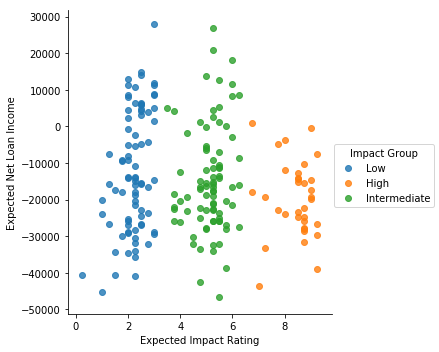

In [10]:
sns.lmplot(x='Expected Impact Rating',
           y='Expected Net Loan Income',
           data=data,
           hue='Impact Group',
           fit_reg=False)


In [11]:
loans = list(data['Loan Object'])
loans[0:5]

In [12]:
from structures_and_methods import greedy, test_greedy, test_greedies
test_greedies(loans)

Use greedy by impact to choose loans to make: 
Total Impact Rating of Loans: 177.75
Total Net Income of Loans:    $-416070.0
Loan #: 97
Loan #: 98
Loan #: 116
Loan #: 117
Loan #: 56
Loan #: 86
Loan #: 139
Loan #: 169
Loan #: 170
Loan #: 18
Loan #: 21
Loan #: 66
Loan #: 93
Loan #: 140
Loan #: 141
Loan #: 142
Loan #: 147
Loan #: 167
Loan #: 2
Loan #: 13

Use greedy by net income to choose loans to make: 
Total Impact Rating of Loans: 75.5
Total Net Income of Loans:    $269646.0
Loan #: 46
Loan #: 177
Loan #: 126
Loan #: 171
Loan #: 113
Loan #: 134
Loan #: 91
Loan #: 158
Loan #: 154
Loan #: 200
Loan #: 119
Loan #: 59
Loan #: 69
Loan #: 45
Loan #: 193
Loan #: 37
Loan #: 124
Loan #: 194
Loan #: 145
Loan #: 148

Use greedy by # of female farmers or employees affected: 
Total Impact Rating of Loans: 86.5
Total Net Income of Loans:    $-205645.0
Loan #: 158
Loan #: 159
Loan #: 172
Loan #: 116
Loan #: 117
Loan #: 165
Loan #: 5
Loan #: 134
Loan #: 177
Loan #: 178
Loan #: 26
Loan #: 27
Loan #: 11